# 토픽모델링 (LDA)
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)

In [2]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from  konlpy.tag import Twitter

In [3]:
df_train = pd.read_excel('data/news_1500.xlsx', names=['기사'], delimiter='\t', keep_default_na=False)

#Countvectorizer적용을 위해 list로 변환
list_train = df_train['기사'].tolist()

In [4]:
twitter = Twitter()
results = []
for line in list_train:
    word_list = twitter.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

In [5]:
vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

# 모델 생성과 변환을 한 번에 합니다
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다
document_topics = lda.fit_transform(X)

In [6]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [7]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

In [8]:
# 10개의 토픽을 출력합니다
%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")
        
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
대통령           해외            리그            국가            공개            
트럼프           수출            전북            경제            포켓몬           
소녀            대한            현대            대통령           게임            
여성            대통령           acl           정부            화제            
정부            시장            연맹            개국            미란다           
독일            도시            챔피언스리그        지역            결혼            
시드니           달러            축구            회의            해밍턴           
보도            12            밉다            협정            연구            
학생            지난해           조별            20            출시            
위해            조사            클래식           주요            국제            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
정부  

In [9]:
# 100개 토픽 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [10]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [11]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
옥스퍼드          국가            호수            가재            터키            
단어            이봉원           무섭다           선거            실장            
셀피            캐럿            위성            전인            tv            
자유형           빙하            정부            울산            위안부           
리우데자네이루       뉴질랜드          발생            난민            메이저           
출판사           개국            공개            우에다           윌리엄스          
선정            올해            할머니           김세영           과장            
가재            정상            윤두준           경기            협력            
selfie        apec          장하나           의무            단체            
400           회의            조작            정부            여성            


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
대학생 

In [12]:
# 골프 관련 토픽 89를 가중치로 정렬합니다
golf = np.argsort(document_topics100[:, 89])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in golf[:2]:
    # 첫 두 문장을 출력합니다
    print(list_train[i], "\n")

올시즌 미국여자프로골프(LPGA)투어에서 미국 선수들의 약진이 예사롭지 않다. 지난해 33개 대회에서 단 2승에 불과했던 미국 선수들은 30일 북중미 카리브해 섬나라 바하마의 파라다이스 아일랜드 오션클럽 골프코스(파73 6644야드)에서 끝난 시즌 첫 대회인 퓨어실크 바하마 클래식(총상금 140만달러 약 16억8000만원)에서 베테랑 브리트니 린시컴이 .. 

여자골프 세계랭킹 1위 리디아 고(19 한국명 고보경)의 2주 연속 우승이냐, 태극낭자의 3개 대회 싹쓸이냐. 
 
지난주 유럽여자골프(LET)투어 개막전인 뉴질랜드 여자오픈에서 새해 첫 승을 신고한 리디아 고가 이번엔 미국여자프로골프(LPGA)투어에서 정상을 지키기 위해 나선다. 리디아 고는 비록 유럽투어이지만 LPGA투어 두번째 대회인 코츠골프 챔피.. 



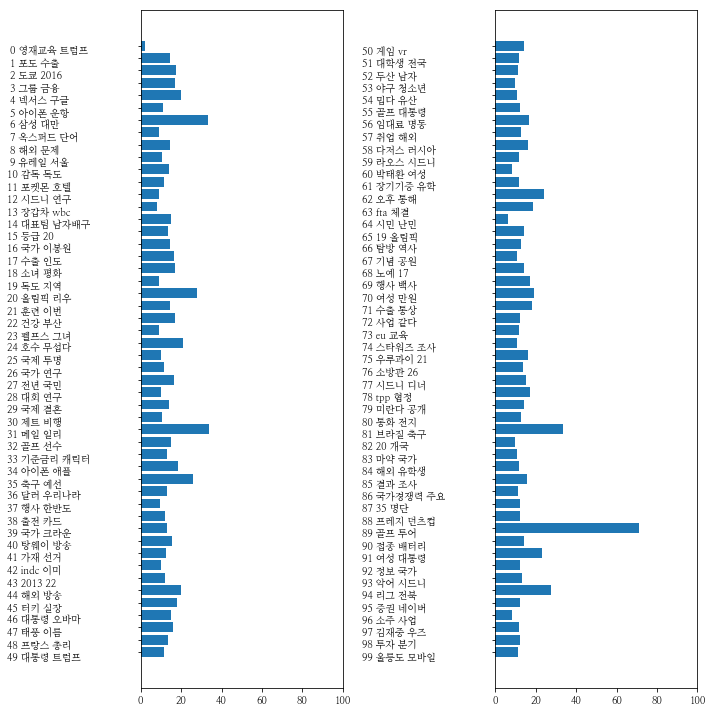

In [40]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# 폰트문제 처리 (윈도우나 리눅스 등에 따라 폰트 경로 상이함)
font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
    
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()